# Gaussian Mixture Model (GMM)
- distribution-based clustering 
- assumes data is generated from a mixture of probability distributions and assigns points to cluster based on statistical likelihood 
- clusters with flexible shapes
- requires specifying the number of distributions

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from metrics.internal_metrics import compute_all_metrics

In [12]:
data = pd.read_csv('../dataset/Dortmund_features_preprocessed.csv', index_col=0)
features = data.values
subject_ids = data.index.values

print(f"Data shape: {features.shape}")
print(f"Number of subjects: {len(subject_ids)}")
print(f"Number of features: {features.shape[1]}")

Data shape: (600, 100)
Number of subjects: 600
Number of features: 100


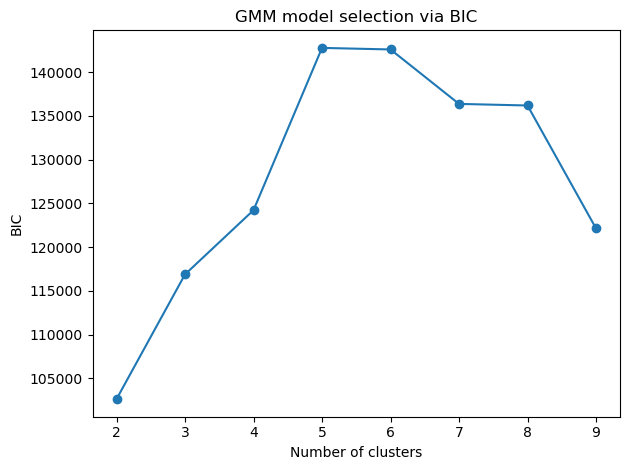

Best number of clusters according to BIC: 2


In [13]:
n_components_range = range(2, 10)  # try 2 to 9 clusters
bics = []

for n in n_components_range:
    gmm = GaussianMixture(
        n_components=n,        # number of Gaussian clusters
        covariance_type='full',
        random_state=42
    )

    gmm.fit(features) # learn parameters from data

    # Bayesian Information Criterion: model selection criterion that penalizes model when it is too complex
    bics.append(gmm.bic(features)) 

# Plot BIC vs number of components
plt.figure()
plt.plot(n_components_range, bics, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("BIC")
plt.title("GMM model selection via BIC")
plt.tight_layout()
plt.show()

best_n = n_components_range[np.argmin(bics)]
print("Best number of clusters according to BIC:", best_n)

In [ ]:
k = best_n  

gmm_final = GaussianMixture(
    n_components=k,
    covariance_type='full',
    random_state=42
)
gmm_final.fit(features)

cluster_labels = gmm_final.predict(features)       # hard cluster labels

# Compare different number of clusters (n) using all metrics not only BIC

Testing different k values with GMM...
n=2: Silhouette=0.1315, Davies-Bouldin=2.3990, Calinski-Harabasz=98.16, BIC=102605.75, AIC=57312.97
n=3: Silhouette=0.1244, Davies-Bouldin=2.4365, Calinski-Harabasz=72.87, BIC=116871.47, AIC=48930.11
n=4: Silhouette=0.0946, Davies-Bouldin=2.4264, Calinski-Harabasz=61.08, BIC=124217.76, AIC=33627.81
n=5: Silhouette=0.0733, Davies-Bouldin=2.5659, Calinski-Harabasz=54.08, BIC=142775.69, AIC=29537.16
n=6: Silhouette=0.0728, Davies-Bouldin=2.5645, Calinski-Harabasz=48.04, BIC=142597.11, AIC=6710.00
n=7: Silhouette=0.0666, Davies-Bouldin=2.4248, Calinski-Harabasz=43.75, BIC=136371.65, AIC=-22164.05
n=8: Silhouette=0.0679, Davies-Bouldin=2.4192, Calinski-Harabasz=41.46, BIC=136188.63, AIC=-44995.66
n=9: Silhouette=0.0654, Davies-Bouldin=2.4244, Calinski-Harabasz=38.58, BIC=122130.39, AIC=-81702.47


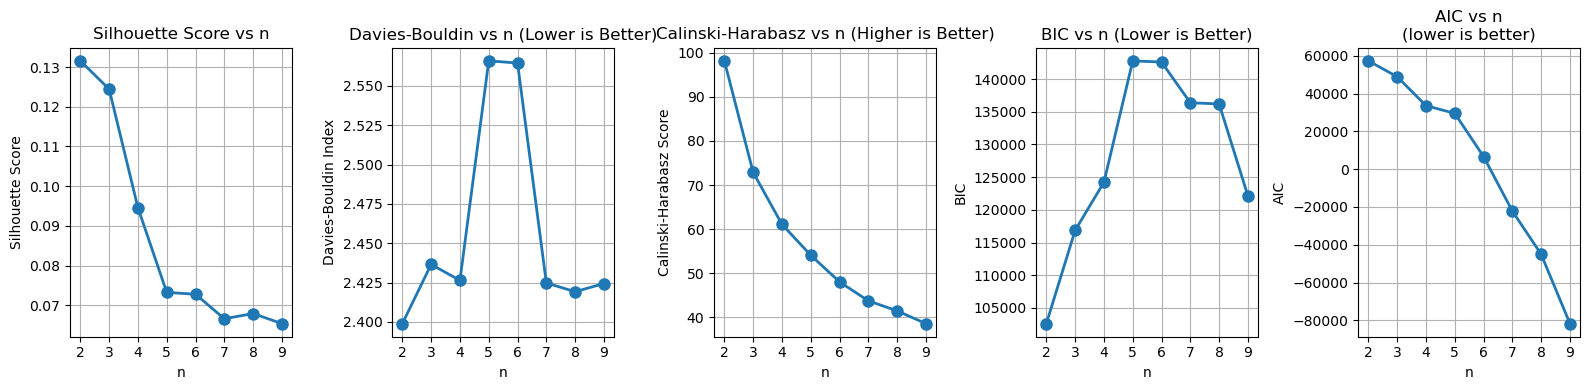

<Figure size 640x480 with 0 Axes>

In [ ]:
n_components_range = range(2, 10)  # try 2 to 9 clusters
results_n = {}

print("Testing different k values with GMM...")
for n in n_components_range:
    # Fit GMM
    gmm = GaussianMixture(
        n_components=n,
        covariance_type='full',
        random_state=42
    )
    gmm.fit(features)

    # Hard cluster assignments (0..k-1)
    labels = gmm.predict(features)

    # Compute clustering metrics (same as with k-means)
    metrics_n = compute_all_metrics(features, labels, include_dunn=False)

    # You can also store BIC / AIC if you want
    bic = gmm.bic(features)
    aic = gmm.aic(features) # accepts more complex models

    results_n[n] = {
        'gmm': gmm,
        'labels': labels,
        'metrics': metrics_n,
        'bic': bic,
        'aic': aic
    }

    print(f"n={n}: Silhouette={metrics_n['silhouette_score']:.4f}, "
          f"Davies-Bouldin={metrics_n['davies_bouldin_score']:.4f}, "
          f"Calinski-Harabasz={metrics_n['calinski_harabasz_score']:.2f}, "
          f"BIC={bic:.2f}, AIC={aic:.2f}")

# ====== PLOTS ======
plt.figure(figsize=(16, 4))

# 1) Silhouette
plt.subplot(1, 5, 1)
silhouettes = [results_n[n]['metrics']['silhouette_score'] for n in n_components_range]
plt.plot(n_components_range, silhouettes, 'o-', linewidth=2, markersize=8)
plt.xlabel('n')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs n')
plt.grid(True)
plt.xticks(n_components_range)

# 2) Davies-Bouldin
plt.subplot(1, 5, 2)
db_scores = [results_n[n]['metrics']['davies_bouldin_score'] for n in n_components_range]
plt.plot(n_components_range, db_scores, 'o-', linewidth=2, markersize=8)
plt.xlabel('n')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin vs n (Lower is Better)')
plt.grid(True)
plt.xticks(n_components_range)

# 3) Calinski-Harabasz
plt.subplot(1, 5, 3)
ch_scores = [results_n[n]['metrics']['calinski_harabasz_score'] for n in n_components_range]
plt.plot(n_components_range, ch_scores, 'o-', linewidth=2, markersize=8)
plt.xlabel('n')
plt.ylabel('Calinski-Harabasz Score')
plt.title('Calinski-Harabasz vs n (Higher is Better)')
plt.grid(True)
plt.xticks(n_components_range)

# 4) BIC (specific to GMM)
plt.subplot(1, 5, 4)
bics = [results_n[n]['bic'] for n in n_components_range]
plt.plot(n_components_range, bics, 'o-', linewidth=2, markersize=8)
plt.xlabel('n')
plt.ylabel('BIC')
plt.title('BIC vs n (Lower is Better)')
plt.grid(True)
plt.xticks(n_components_range)


# 5) AIC
plt.subplot(1, 5, 5)
aics = [results_n[n]['aic'] for n in n_components_range]
plt.plot(n_components_range, aics, 'o-', linewidth=2, markersize=8)
plt.xlabel('n')
plt.ylabel('AIC')
plt.title('AIC vs n\n(lower is better)')
plt.grid(True)
plt.xticks(n_components_range)

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()
